
# <span style="color:rgb(213,80,0)">Tutorial 9 \- Simulate a cylindrical cell</span>

## Introduction

In this tutorial, we simulate a multilayer pouch cell. We use the same material property as in the other tutorials


In [1]:
jsonstruct_material = parseBattmoJson('Examples/jsondatafiles/sample_input.json');


Next, we load and parse a json file where we have chosen some parameters for the multilayer pouch domain. Note that all the parameters are described in a json schema, see [Geometry.schema.json](https://github.com/BattMoTeam/BattMo/blob/main/Utilities/JsonSchemas/Geometry.schema.json), even if the simplest way to proceed is to start with an example, in this case given by [4680\-geometry.json](https://github.com/BattMoTeam/BattMo/blob/main/Examples/JsonDataFiles/4680-geometry.json).


In [2]:
jsonfilename = 'Examples/JsonDataFiles/4680-geometry.json';
jsonstruct_geometry = parseBattmoJson(jsonfilename);


We change some parameters to get a smaller model and simulation time.


In [3]:
jsonstruct_geometry.Geometry.outerRadius = jsonstruct_geometry.Geometry.innerRadius + 4*milli*meter;
jsonstruct_geometry.Geometry.numberOfDiscretizationCellsVertical = 2;
jsonstruct_geometry.Geometry.numberOfDiscretizationCellsAngular  = 20;


We use [FlatJsonViewer.m](https://github.com/BattMoTeam/BattMo/blob/main/Utilities/JsonUtils/FlatJsonViewer.m) to flatten the json structure and print it to screen.


In [4]:
fjv = flattenJsonStruct(jsonstruct_geometry);

                          parameter name                          parameter value
    __________________________________________________________    _______________
    {'include_current_collectors'                            }    {[         1]} 
    {'Geometry.case'                                         }    {'jellyRoll' } 
    {'Geometry.innerRadius'                                  }    {[    0.0020]} 
    {'Geometry.outerRadius'                                  }    {[    0.0060]} 
    {'Geometry.height'                                       }    {[    0.0700]} 
    {'Geometry.numberOfDiscretizationCellsVertical'          }    {[         2]} 
    {'Geometry.numberOfDiscretizationCellsAngular'           }    {[        20]} 
    {'NegativeElectrode.Coating.thickness'                   }    {[9.4000e-05]} 
    {'NegativeElectrode.Coating.N'                           }    {[         3]} 
    {'NegativeElectrode.Coating.SolidDiffusion.N'            }    {[         5]} 
    {'NegativeEl

In [5]:
fjv.print();

                          parameter name                          parameter value
    __________________________________________________________    _______________
    {'include_current_collectors'                            }    {[         1]} 
    {'Geometry.case'                                         }    {'jellyRoll' } 
    {'Geometry.innerRadius'                                  }    {[    0.0020]} 
    {'Geometry.outerRadius'                                  }    {[    0.0060]} 
    {'Geometry.height'                                       }    {[    0.0700]} 
    {'Geometry.numberOfDiscretizationCellsVertical'          }    {[         2]} 
    {'Geometry.numberOfDiscretizationCellsAngular'           }    {[        20]} 
    {'NegativeElectrode.Coating.thickness'                   }    {[9.4000e-05]} 
    {'NegativeElectrode.Coating.N'                           }    {[         3]} 
    {'NegativeElectrode.Coating.SolidDiffusion.N'            }    {[         5]} 
    {'NegativeEl


We load and parse the control protocol


In [6]:
jsonfilename = fullfile('Examples', 'jsondatafiles', 'cc_discharge_control.json');
jsonstruct_control = parseBattmoJson(jsonfilename);


We load and parse the simulation settings. This is optional. Typically, reasonable choices are made by default.


In [7]:
jsonfilename = fullfile('Examples', 'jsondatafiles', 'simulation_parameters.json');
jsonstruct_simparams = parseBattmoJson(jsonfilename);


Now, we can merge these parameter definitions into a single parameter set to obtain a jsonstruct that has all the input needed by the simulator.


In [8]:
jsonstruct = mergeJsonStructs({jsonstruct_geometry , ...
    jsonstruct_material , ...
    jsonstruct_control  , ...
    jsonstruct_simparams}, 'warn', false);

## Setup the model for inspection

When we run the simulation using function [runBatteryJson.m](https://github.com/BattMoTeam/BattMo/blob/main/Examples/JsonInput/runBatteryJson.m), the model is setup. In the case where we want to setup the model for inspection, prior to simulation, we can use the function [setupModelFromJson.m](https://github.com/BattMoTeam/BattMo/blob/main/Utilities/JsonUtils/setupModelFromJson.m)


In [9]:
model = setupModelFromJson(jsonstruct);


We use the [plotBatteryGrid.m](https://github.com/BattMoTeam/BattMo/blob/main/Utilities/Visualization/plotBatteryGrid.m) function to show the grid


In [10]:
plotBatteryGrid(model)

ans = 
  Figure (12) with properties:
      Number: 12
        Name: ''
       Color: [1 1 1]
    Position: [680 458 560 420]
       Units: 'pixels'
  Use GET to show all properties


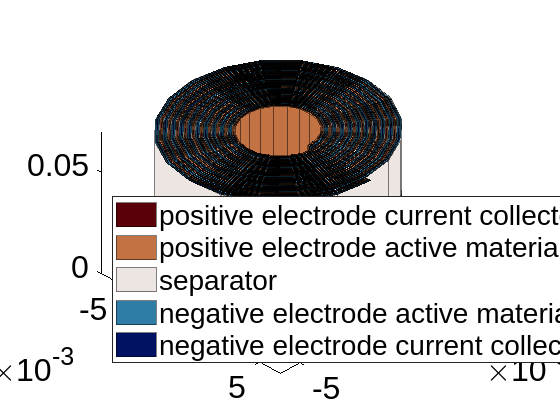

In [11]:
% make the axis tight and set the camera viewing angle
axis tight
view(45,45)

## Run the simulation

In [12]:
output = runBatteryJson(jsonstruct);

Solving timestep 001/155:                      -> 1 Second, 50 Milliseconds
| It # | ctrl_controlEquation (cell) | ne_cc_chargeCons (cell) | ctrl_EIequation (cell) | pe_cc_chargeCons (cell) | ne_co_am_sd_massCons (cell) | ne_co_am_sd_solidDiffusionEq (cell) | ne_co_chargeCons (cell) | pe_co_am_sd_massCons (cell) | pe_co_am_sd_solidDiffusionEq (cell) | pe_co_chargeCons (cell) | elyte_chargeCons (cell) | elyte_massCons (cell) |
|    1 |*0.00e+00                    |*0.00e+00                | 1.59e+00               |*0.00e+00                |*0.00e+00                    |*0.00e+00                            |*0.00e+00                |*0.00e+00                    |*0.00e+00                            |*0.00e+00                |*0.00e+00                |*0.00e+00              |
|    2 |*0.00e+00                    |*5.12e-13                |*1.04e-14               |*1.14e-11                | 3.28e-02                    | 3.28e-02                            | 3.45e-02                | 2.66e-

## Visualize the Results

extract the time and voltage quantities


In [13]:
states = output.states;

time    = cellfun(@(state) state.time, states);
voltage = cellfun(@(state) state.('Control').E, states);


We plot the discharge curves together in a new figure



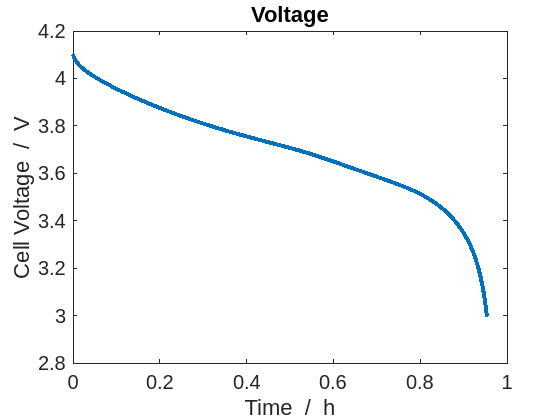

In [14]:
figure();
plot((time/hour), voltage, '-', 'linewidth', 3)
xlabel('Time  /  h')
ylabel('Cell Voltage  /  V')
title('Voltage');


For a given time step, we plot the concentration on the grid in the negative and positive electrodes.



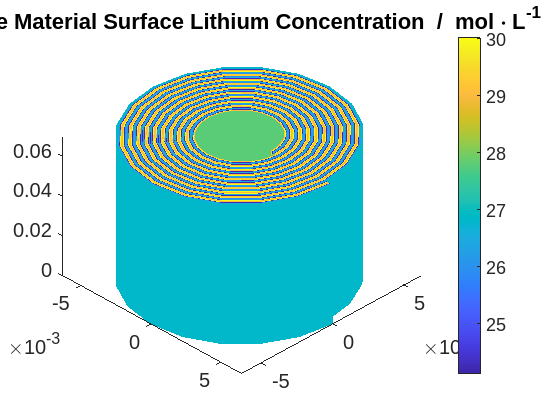

In [15]:
% Set the timestep we want to visualize
timestep = 20;

% get the state of the simulation at the given timestep
state = states{timestep};

% create a new figure
figure()

% plot the surface concentration of lithium in the negative electrode active material
plotCellData(model.NegativeElectrode.Coating.grid, ...
    state.NegativeElectrode.Coating.ActiveMaterial.SolidDiffusion.cSurface/(mol/litre), ...
    'edgecolor', 'none');

% plot the surface concentration of lithium in the positive electrode active material
plotCellData(model.PositiveElectrode.Coating.grid, ...
    state.PositiveElectrode.Coating.ActiveMaterial.SolidDiffusion.cSurface/(mol/litre), ...
    'edgecolor', 'none')

title('Active Material Surface Lithium Concentration  /  mol \cdot L^{-1}');
% add a colorbar
colorbar()
view(45,45)